# **DESAFIO 01 - EVASÃO BANCÁRIA (CHURN)**

Vamos usar [este conjunto de dados](https://github.com/cassiusf/datasets/raw/refs/heads/main/desafios/Churn_Dataset.csv) para tentar prever evasão de clientes no setor bancário.

Este conjunto de dados contém informações sobre clientes bancários que deixaram o banco ou continuam sendo seus clientes. O conjunto de dados inclui as seguintes variáveis:

- **Customer ID**: identificador único para cada cliente
- **Surname**: sobrenome do cliente
- **Credit Score**: valor numérico representando o score de crédito do cliente, ou seja, uma classificação interna do quão bom pagador ele é
- **Geography**: país onde o cliente reside (França, Espanha ou Alemanha)
- **Gender**: gênero do cliente (masculino ou feminino)
- **Age**: idade do cliente.
- **Tenure**: número de anos que o cliente está no banco.
- **Balance**: saldo da conta do cliente.
- **NumOfProducts**: número de produtos bancários utilizados pelo cliente (por exemplo, conta poupança, cartão de crédito).
- **HasCrCard**: se o cliente tem um cartão de crédito (1 = sim, 0 = não).
- **IsActiveMember**: se o cliente é um membro ativo (1 = sim, 0 = não).
- **EstimatedSalary**: renda estimada do cliente.
- **Exited**: evasão do cliente (1 = sim, 0 = não) ***(Variável alvo)***.


## **TAREFA**

Seu objetivo é utilizar um modelo de machine learning rasa para prever a possibilidade de um cliente cancelar sua conta no banco.

Você deverá fazer todas es etapas necessárias tanto na avaliação dos dados disponíveis quanto na preparação necessária para execução do modelo escolhido.

Todas as etapas devem ser documentadas e as escolhas justificadas.

A performance do seu modelo deverá ser avaliada pelas métricas Acurácia, Precision, Recall e F1-Score. Inclua em sua avaliação final de performance Curvas, ROC e/ou Precision-Recall, de acordo com a necessidade.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("https://raw.githubusercontent.com/cassiusf/datasets/refs/heads/main/desafios/Churn_Dataset.csv")
pd.reset_option('all')




2025-04-01 20:01:52.556561: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-01 20:01:52.572578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743548512.584148    1533 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743548512.587727    1533 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743548512.598866    1533 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
pd.set_option('display.max_columns', None)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [4]:
##verifiquei quantos nulos exitem

df.isna().sum()



RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
##decide excluir os nulos

df= df.dropna()




In [6]:
##removendo colunas irrelevantes 

from sklearn.preprocessing import OneHotEncoder, StandardScaler

df.drop(columns=['CustomerId', 'Surname'], inplace=True)

/tmp/ipykernel_1533/749451744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['CustomerId', 'Surname'], inplace=True)


In [7]:
##codificando variveis categoricas 
df = pd.get_dummies(df,columns=["Geography","Gender"], drop_first=True)


In [8]:
##normalização variaveis numericas 
scaler = StandardScaler()
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [9]:
##criei uma tabela so de number para verificar  outlier
df_numerico = df.select_dtypes(include=['int64', 'float64'])
df_numerico = df_numerico.drop(columns=(['Exited',"IsActiveMember","HasCrCard","RowNumber",]))
df_numerico



,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,-0.326298,0.293657,2,-1.225860,1,0.021720
1,-0.440137,0.198305,1,0.117428,1,0.216366
2,-1.537125,0.293657,8,1.333214,3,0.240519
3,0.501618,0.007601,1,-1.225860,2,-0.109083
5,-0.057226,0.484361,8,0.597439,2,0.863478
...,...,...,...,...,...,...
9997,0.605107,-0.278455,7,-1.225860,1,-1.008801
9998,1.257091,0.293657,3,-0.022539,2,-0.125396
9999,1.257091,0.293657,3,-0.022539,2,-0.125396
10000,1.464070,-1.041271,4,0.860094,1,-1.076527


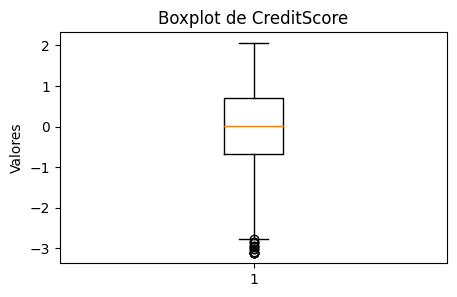

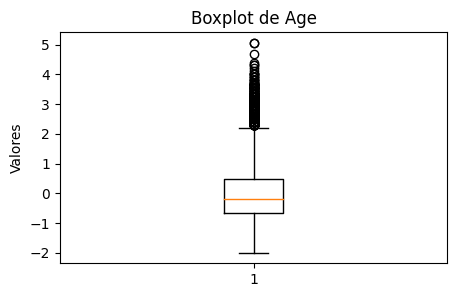

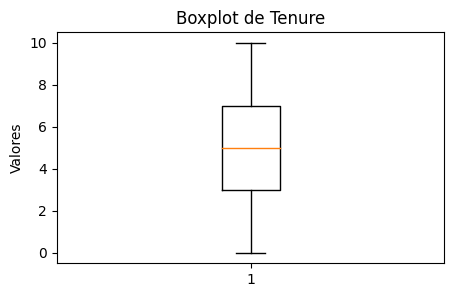

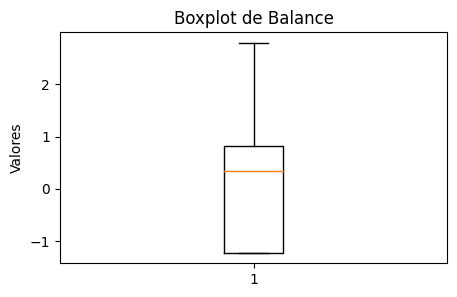

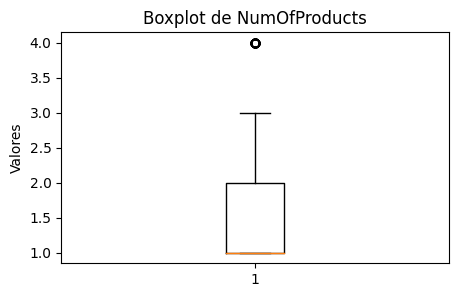

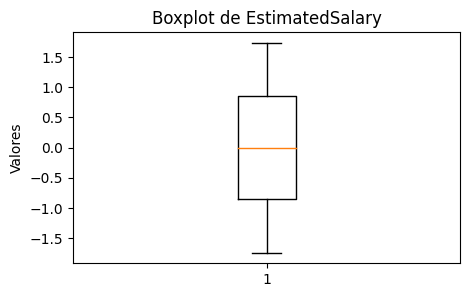

In [10]:
##fazendo boxplot para verificar os outlier de cada coluna
for coluna in df_numerico.columns:
    plt.figure(figsize=(5, 3))
    plt.boxplot(df_numerico[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.ylabel('Valores')
    plt.show()
    

In [11]:
##sepração de treino e teste 

from sklearn.model_selection import train_test_split
##tirando variavel alvo
y = df["Exited"]
X = df.drop(columns=["Exited"])

#separando teste e treino 

X_train , X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3)


In [12]:
from imblearn.over_sampling import SMOTE

##aplicando smote apenas nos dados de treino para 

smote = SMOTE(sampling_strategy=0.5)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)


In [13]:
print("Distribuição após SMOTE:\n", y_train_resampled.value_counts())


Distribuição após SMOTE:
 Exited
0    5561
1    2780
Name: count, dtype: int64


In [14]:
from sklearn.ensemble import RandomForestClassifier
#rodando modelo random forest 

modelo = RandomForestClassifier()
modelo.fit(X_train_resampled, y_train_resampled)

#fazendo predicao 

y_pred = modelo.predict(X_test)

In [15]:
##verificando primeiras predicoes 
print("Primeiras previsões:", y_pred[:10])
print("Valores reais:", y_test[:10].values)  


Primeiras previsões: [1 1 0 0 0 0 0 1 1 0]
Valores reais: [0 1 0 0 1 1 0 1 1 0]


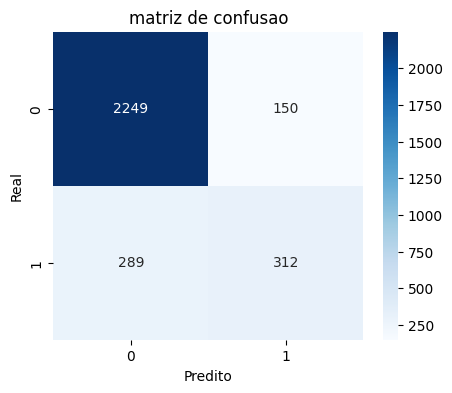

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# grafico para visualizar matriz de confusao 
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("matriz de confusao")
plt.show()

In [17]:
##avaliando metricas 
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2399
           1       0.68      0.52      0.59       601

    accuracy                           0.85      3000
   macro avg       0.78      0.73      0.75      3000
weighted avg       0.84      0.85      0.85      3000



In [ ]:
# Separar features (X) e target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
